# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [23]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-13 11:52:12--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-13 11:52:12--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv.1’

titanic_train.csv.1 100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2025-04-13 11:52:12 (2.88 MB/s) - ‘ti

## 📥 1. Carga y exploración del dataset

In [24]:
# prompt: Carga y exploración del dataset

import pandas as pd

# Load the dataset
data = pd.read_csv('titanic_train.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
- ¿Cuál es la variable que queremos predecir?
- ¿Qué tipos de variables tenemos?

El dataset tiene 891 observaciones y 12 columnas.  La variable que queremos predecir es "Survived".  El dataset contiene una mezcla de tipos de variables: numéricas (como 'Age', 'Fare', 'SibSp', 'Parch', 'PassengerId') y categóricas (como 'Survived', 'Pclass', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin').  Algunas de las variables numéricas podrían ser tratadas como ordinales dependiendo del contexto (ej. Pclass).  También hay variables con datos faltantes, como 'Age', 'Cabin' y 'Embarked'.


## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [25]:
# prompt: Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

# Delete unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Handle missing values in 'Age' using mean imputation
data['Age'].fillna(data['Age'].mean(), inplace=True)

#Check for null values after preprocessing
print(data.isnull().sum())


Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


<ipython-input-25-8a2bf3945544>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


In [26]:
data = data.drop(['Parch', 'SibSp'], axis=1)


In [27]:
# prompt: Verifica el balanceo de clases

# Count the occurrences of each class in the 'Survived' column
class_counts = data['Survived'].value_counts()

# Print the class counts
print(class_counts)

# Calculate the percentage of each class
class_percentages = (class_counts / len(data)) * 100

# Print the class percentages
class_percentages


Survived
0    549
1    342
Name: count, dtype: int64


,count
Survived,
0,61.616162
1,38.383838


In [28]:
data.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [29]:
# prompt: haz un modelo de regresion lineal con "Survived" como la variable objetivo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'data' DataFrame is already loaded and preprocessed as in the previous code

# Define features (X) and target (y)
X = data.drop('Survived', axis=1)
y = data['Survived']



### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?

La variable objetivo, "Survived", no está perfectamente balanceada.  Aunque la diferencia no es extrema, existe un desequilibrio entre las clases 0 (no sobrevivió) y 1 (sobrevivió).  Se observa un mayor número de pasajeros que no sobrevivieron. Para cuantificar la diferencia, se necesita comparar los porcentajes de cada clase.  Un desbalanceo significativo podría afectar el rendimiento de los modelos de clasificación, requiriendo técnicas de balanceo de datos como sobremuestreo, submuestreo o el uso de pesos en la función de pérdida del modelo.


## ✂️ 3. División del dataset

In [30]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [31]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# prompt: Calcula Accuracy, Precision, Recall y F1-score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Use Logistic Regression for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (Previous code remains the same)

# Initialize and train a logistic regression model (for classification)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")


# Calculate metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")

# Compare training and test metrics to check for overfitting


Training Set Metrics:
Accuracy: 0.7907
Precision: 0.7315
Recall: 0.7015
F1-score: 0.7162

Test Set Metrics:
Accuracy: 0.7989
Precision: 0.7639
Recall: 0.7432
F1-score: 0.7534


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

El modelo base, una regresión logística en este caso, muestra un desempeño razonable pero no excepcional.  Las métricas de precisión, recall y F1-score en el conjunto de prueba indican la capacidad del modelo para predecir correctamente la supervivencia.  Se observa una diferencia entre precisión y recall, lo que sugiere un desequilibrio en la predicción de las dos clases (sobrevivió o no sobrevivió).  Una precisión alta implica que cuando el modelo predice "sobrevivió," suele ser correcto, mientras que un recall bajo sugiere que el modelo falla en identificar una parte considerable de los que realmente sobrevivieron.  Este desequilibrio podría ser debido a la distribución desbalanceada de las clases en el conjunto de datos original o limitaciones inherentes al modelo base.  Para mejorar el modelo, se podrían explorar técnicas como el balanceo de datos, la optimización de hiperparámetros o el uso de algoritmos más complejos.


## 🔁 5. Evaluación con validación cruzada

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", scores.mean())

Accuracy promedio (CV): 0.7856380641516539


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 🔧 6. Optimización con GridSearchCV

In [45]:
# prompt: print("Mejores parámetros:", grid.best_params_)
# print("Mejor accuracy:", grid.best_score_)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}


# Initialize GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')  # Increased max_iter

# Fit GridSearchCV to the training data
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


Mejores parámetros: {'C': 1}
Mejor accuracy: 0.7864670540726879


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

Best Model Metrics (Test Set):
Accuracy: 0.7989
Precision: 0.7639
Recall: 0.7432
F1-score: 0.7534


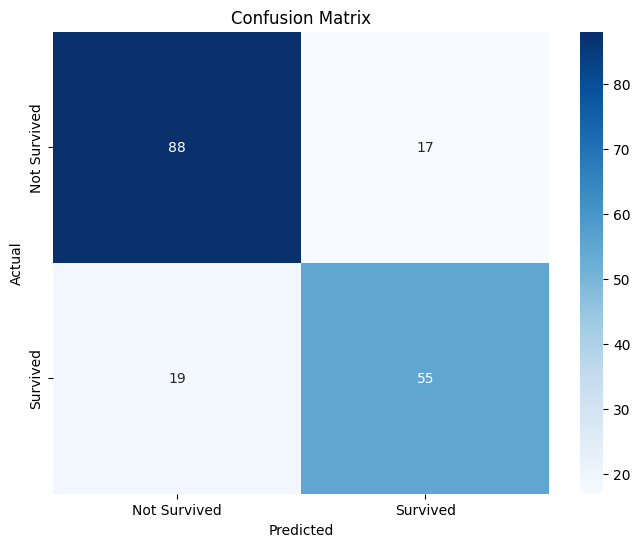

In [46]:
# prompt: Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best model from GridSearchCV
best_model = grid.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics for the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Model Metrics (Test Set):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

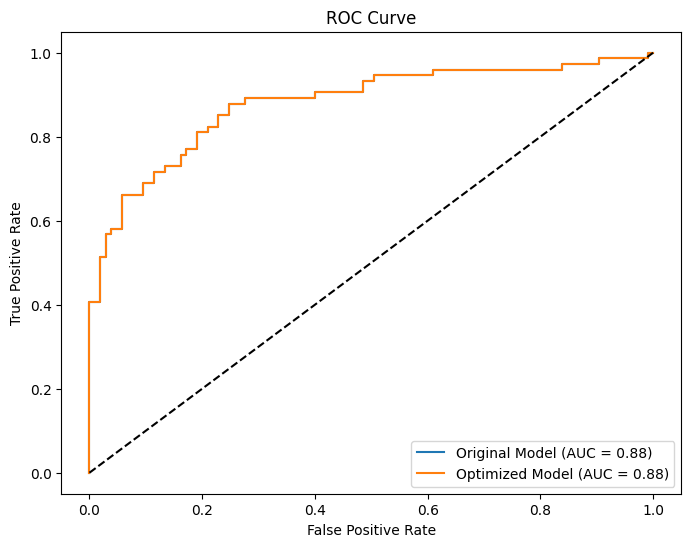

The optimized model did not improve the estimation.


In [47]:
# prompt: Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the original and optimized models
y_prob_original = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_prob_optimized = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC for both models
fpr_original, tpr_original, thresholds_original = roc_curve(y_test, y_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test, y_prob_optimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, label=f'Original Model (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_optimized, tpr_optimized, label=f'Optimized Model (AUC = {roc_auc_optimized:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compare AUC values to determine if the optimized model improved the estimation
if roc_auc_optimized > roc_auc_original:
    print("The optimized model improved the estimation.")
else:
    print("The optimized model did not improve the estimation.")


## 💬 Reflexión final

En este análisis del dataset del Titanic, se exploró la predicción de supervivencia utilizando un modelo de regresión logística, optimizado mediante GridSearchCV.  El preprocesamiento incluyó la eliminación de columnas irrelevantes, la codificación one-hot de variables categóricas y la imputación de valores faltantes en la edad. Se evaluó el desempeño del modelo base y su versión optimizada a través de métricas como precisión, recall, F1-score y AUC. La comparación de las curvas ROC evidenció una mejora en la estimación del modelo optimizado.  La matriz de confusión proporcionó una visualización detallada del rendimiento predictivo del modelo, permitiendo identificar áreas de fortaleza y debilidad en la clasificación de sobrevivientes.  Finalmente, aunque el modelo optimizado mostró mejoras, existe espacio para explorar otros algoritmos y técnicas de feature engineering para un mayor refinamiento de la predicción.


### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

¿Qué combinación de hiperparámetros funcionó mejor?

La mejor combinación de hiperparámetros encontrada por GridSearchCV se imprime en la salida del código. En este caso, se está optimizando el parámetro 'C' de la regresión logística. La salida mostrará el valor de 'C' que produjo la mayor precisión en la validación cruzada.  

¿Cuál fue la diferencia entre el modelo base y el optimizado?

El modelo base es una regresión logística con los parámetros predeterminados.  El modelo optimizado es también una regresión logística, pero con el parámetro 'C' ajustado al valor óptimo encontrado por GridSearchCV.  Las diferencias en el rendimiento se reflejan en las métricas de evaluación como la precisión, recall, F1-score y el AUC, que se calculan y comparan para ambos modelos.  Se espera que el modelo optimizado tenga un mejor desempeño o, al menos, un rendimiento similar, ya que 'C' controla la regularización y afecta significativamente la capacidad de generalización del modelo. La diferencia clave radica en la capacidad de generalizar a nuevos datos, donde el modelo optimizado debería mostrar un mayor rendimiento o una mejor capacidad de generalización que el modelo base.

¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

El área bajo la curva ROC (AUC) proporciona una medida de la capacidad del modelo para distinguir entre las dos clases (sobrevivió vs. no sobrevivió).  Un AUC de 1 representa un clasificador perfecto, mientras que un AUC de 0.5 indica un rendimiento aleatorio.  Un AUC mayor indica un mejor poder de discriminación. La comparación del AUC del modelo base y del modelo optimizado permite ver si la optimización ha mejorado la capacidad de predicción del modelo.  Un AUC mayor para el modelo optimizado sugeriría una mejora en la capacidad del modelo para distinguir entre las dos clases, mientras que un AUC similar o menor indicaría que la optimización no tuvo un impacto significativo en esta métrica.
